In [2]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white")

df = pd.read_csv('results.csv')

method_Names = {}
method_Names['JaccardDistanceMatcher'] = 'JacMather'
method_Names['SimilarityFlooding'] = 'SimFlood'
method_Names['DistributionBased'] = 'DistBased'

df['Method'] = df['Method'].map(lambda x: method_Names.get(x, x))
df.head(5)

,Study,Method,F1,Precision,Recall,RecallAtSizeofGroundTruth,Runtime(s)
0,Krug,JacMather,0.0,0.0,0.0,0.0,138.9372
1,Krug,Coma,0.5,0.5,0.5,0.5,14.2029
2,Krug,SimFlood,0.0,0.0,0.0,0.0,2.3812
3,Krug,DistBased,0.0,0.0,0.0,0.0,8.9848
4,Krug,Cupid,0.0,0.0,0.0,0.0,41.3587


In [3]:
# df_measures = df.melt(id_vars=['Study','Method'], value_vars=['F1', 'Precision','Recall', 'RecallAtSizeofGroundTruth', 'Runtime(s)'], var_name='Measure', value_name='value')
df_measures = df.melt(id_vars=['Study','Method'], value_vars=['F1', 'Precision','Recall'], var_name='Measure', value_name='value')
df_measures

,Study,Method,Measure,value
0,Krug,JacMather,F1,0.000000
1,Krug,Coma,F1,0.500000
2,Krug,SimFlood,F1,0.000000
3,Krug,DistBased,F1,0.000000
4,Krug,Cupid,F1,0.000000
...,...,...,...,...
130,Dou,JacMather,Recall,0.388889
131,Dou,Coma,Recall,0.222222
132,Dou,SimFlood,Recall,0.222222
133,Dou,DistBased,Recall,0.166667


Text(0.5, 0.98, 'Average matching performance of five traditional methods, for each study')

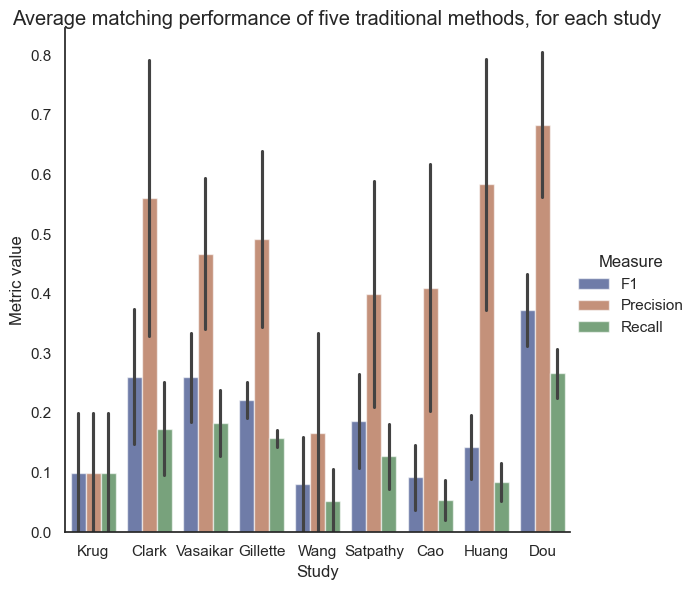

In [8]:
g = sns.catplot(
    data=df_measures, kind="bar",
    x="Study", y="value",hue="Measure",
    errorbar="se", palette="dark", alpha=.6, height=6
)
# g.despine(left=True)
g.set_axis_labels("Study", "Metric value")

g.figure.subplots_adjust(top=0.95) # adjust the Figure in rp
g.figure.suptitle('Average matching performance of five traditional methods, for each study')


Text(0.5, 0.98, 'Performance of each traditional method in matching GDC columns')

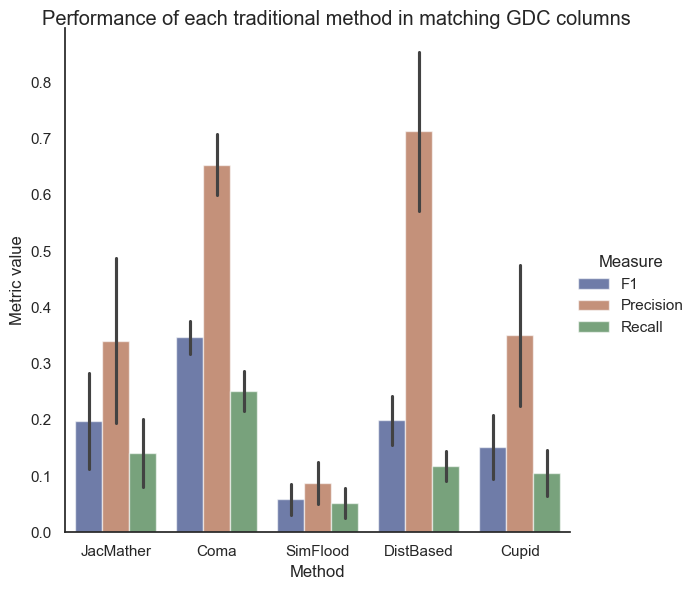

In [9]:
g = sns.catplot(
    data=df_measures, kind="bar",
    x="Method", y="value",hue="Measure",
    errorbar="se", palette="dark", alpha=.6, height=6
)
# g.despine(left=True)
g.set_axis_labels("Method", "Metric value")

g.figure.subplots_adjust(top=0.95) # adjust the Figure in rp
g.figure.suptitle('Performance of each traditional method in matching GDC columns')